# Karthika Pai
# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

In [1]:
#import statements

import numpy as np
import pandas as pd
import nltk
import urllib
import itertools

import requests
import requests_cache

import string
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

from bs4 import BeautifulSoup

plt.style.use('ggplot')
%matplotlib inline

requests_cache.install_cache("cache")
#nltk.download()

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [2]:
def get_urls(url, page=1):
    '''Takes in url string and page number (default of one). Returns 
    a list of article URLS, where each string is a url belonging 
    to category. Recursive.
    
    input: string, page number (int)
    output: list of url strings'''
    if page == 0:
        return [] #empty list if page is 0, base case
    final_url = url + str(page)
    response = requests.get(final_url)
    soup = BeautifulSoup(response.text, 'lxml') #using beautiful soup
    articles = soup.select("div.post-box") #article list in this div
    return get_urls(url, page-1) + [x.a['href'] for x in articles] 
    

#testing - I'm testing each section asking for two pages of links
print "CAMPUS"
campus_list = get_urls('https://theaggie.org/campus/page/', 2)
print campus_list
print len(campus_list) #30

print "SPORTS"
sports_list = get_urls('https://theaggie.org/sports/page/', 2)
print sports_list
print len(sports_list) #30

print "ARTS & CULTURE"
arts_list = get_urls('https://theaggie.org/arts/page/', 2)
print arts_list 
print len(arts_list) #30


CAMPUS
['https://theaggie.org/2017/02/17/uc-davis-students-participate-in-uc-wide-nodapl-day-of-action/', 'https://theaggie.org/2017/02/17/uc-davis-holds-first-mental-health-conference/', 'https://theaggie.org/2017/02/16/last-week-in-senate-6/', 'https://theaggie.org/2017/02/16/2017-asucd-winter-elections-meet-the-candidates/', 'https://theaggie.org/2017/02/14/shields-library-hosts-new-exhibit-for-davis-centennial/', 'https://theaggie.org/2017/02/14/student-health-and-counseling-services-hosts-step-up-to-the-plate-campaign/', 'https://theaggie.org/2017/02/13/pe-classes-may-charge-additional-fees/', 'https://theaggie.org/2017/02/12/11-new-chancellor-fellows-honored-for-2016/', 'https://theaggie.org/2017/02/12/muslim-students-respond-to-recent-political-events/', 'https://theaggie.org/2017/02/12/sexcessful-campaign-launched-in-time-for-valentines-day/', 'https://theaggie.org/2017/02/10/michael-chan-sworn-in-as-interim-senator/', 'https://theaggie.org/2017/02/09/university-of-california-r

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

In [3]:
def extract_info(article_url):
    '''given an article url, function extracts author, text, title
    and url from article.
    input: article url string
    output: dictionary with unicode string values of author, text
    title and url'''
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'lxml')
    actualtitle = (soup.title.string).split('|',1)[0] #get rid of | The Aggie
    text_with_author = ([te.text for te in soup.find_all('p')])
    author = 'N/A' #initital
    content = ' '.join(text_with_author)
    author = "Written by:" + (content.split(':')[-1]).split('.org')[0] + ".org" #get author
    #some articles have author name as 2nd to last p element
    if text_with_author[-1].startswith("You must be"):
        content = ' '.join(text_with_author[0:-2]) 
    else:
        content = ' '.join(text_with_author[0:-1])
    article_dict = {'author': author, 'text': content.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 }), 
                    'title': actualtitle, 'url': article_url}
    return article_dict
    
w = extract_info('https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/')
w

{'author': u'Written by: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
 'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design.  Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager.  "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Tot

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [4]:
campus = 'https://theaggie.org/campus/page/'
city = 'https://theaggie.org/city/page/'

campus_frame = city_frame = pd.DataFrame(columns=['author', 'text', 'title', 'url', 'category'])
campuslist = get_urls(campus, 4) #4 pages for 60 articles
citylist = get_urls(city, 4)

for element1, element2 in zip(campuslist, citylist): #iterate through each frame
    campus_frame = campus_frame.append(extract_info(element1), ignore_index=True)
    campus_frame.category = 'campus'
    city_frame = city_frame.append(extract_info(element2), ignore_index=True)
    city_frame.category = 'city'
frames = [city_frame, campus_frame]
bigframe = pd.concat(frames)
bigframe = bigframe.reset_index(drop=True) #reset index to start from 0
bigframe

,author,text,title,url,category
0,Written by: Raul Castellanos Jr — city@theaggi...,Mayor Robb Davis reaffirms that the City of Da...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/19/city-of-davis-...,city
1,Written by: Sam Solomon — city@theaggie.org,"The world is a weird place Feb. 6 ""Chronic pho...",Police Logs,https://theaggie.org/2017/02/19/police-logs-12/,city
2,Written by: Raul Castellanos Jr — city@theaggi...,Mayor Robb Davis reaffirms that the City of Da...,City of Davis to retain sanctuary city status,https://theaggie.org/2017/02/16/city-of-davis-...,city
3,Written by: Samantha Solomon — city@theaggie.org,Davis resident Lauren Kirk-Coehlo arrested in ...,Suspect in Davis Islamic Center vandalism arre...,https://theaggie.org/2017/02/15/suspect-in-dav...,city
4,Written by: Bianca Antunez — city@theaggie.org,Davis residents create financial model to make...,Project Toto aims to address questions regardi...,https://theaggie.org/2017/02/14/project-toto-a...,city
5,Written by: Kaelyn Tuermer-Lee — city@theaggie...,"Something smells fishy Jan. 29 ""Loud music o...",Police Logs,https://theaggie.org/2017/02/13/police-logs-11/,city
6,Written by: Dianna Rivera — city@theaggie.org,Davis Cemetery District hosts fundraiser with ...,News in Brief: A Valentine’s Day for everybody,https://theaggie.org/2017/02/12/news-in-brief-...,city
7,Written by: Kaelyn Tuermer-Lee — city@theaggie...,Davis Sunrise Rotary Club grant benefits Alzhe...,The musical train to memory lane,https://theaggie.org/2017/02/06/the-musical-tr...,city
8,Written by: Kaelyn Tuermer-Lee — city@theaggie...,"False alarm, false alarm Jan. 22 ""Female was r...",Police Logs,https://theaggie.org/2017/02/05/police-logs-10/,city
9,Written by: Bianca Antunez — city@theaggie.org,Burrowing Owl Preservation Society sues City o...,Davis owls face eviction at Marriott Residence...,https://theaggie.org/2017/02/05/davis-owls-fac...,city


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

<h2> What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles? </h2>

Let's answer the first question first. What topics does the Aggie cover the most? There are multiple ways to do this, but for this assignment, we should follow the basic NLP workflow. From Discussion 7, we know that this is:

1. __Tokenize__ -- split text into words
2. __Denoise__ (optional) -- remove stop words, convert words to lemmas, correct spelling, ...
3. __Vectorize__ -- compute term frequencies, tf-idfs, or some other statistic
4. __Analyze__


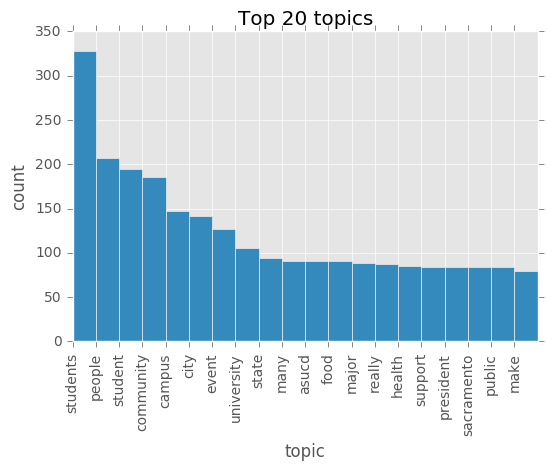

In [5]:
def analyze_corpus(source):
    '''given a source dataframe, looks at the text column and counts 
    frequently occuring topics.
    input: pandas dataframe
    output: list of tuples with count of top topics and topic name
    '''
    corpus = [article for article in source.text]
    joinedcorpus = ' '.join(corpus) # combine entire corpus, entire article set
    tokenize = nltk.word_tokenize # TOKENIZE
    tokenize(joinedcorpus)

    ## code from professor - DENOISING PROCESS
    ## also gets rid of very common words, such as davis, uc etc
    stops = [unicode(word) for word in stopwords.words('english')] + ['re:', 'fwd:', 'also', 'like', 
                                        'said', '\'s', 'davis', 'uc', 'would', 'one', 'year', 'really'                                                                  'university', 'california']
    subject_words = [word.lower() for word in tokenize(joinedcorpus) if word.isalpha() 
                     and word.lower() not in stops]

    ## VECTORIZE
    from collections import Counter
    top = Counter(subject_words).most_common()[:20]

    labels, values = zip(*top)

    return labels, values
    
    
labels, values = analyze_corpus(bigframe) 

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, label=labels)
plt.xticks(indexes, labels, rotation='vertical')
plt.xlabel('topic')
plt.ylabel('count')
plt.title('Top 20 topics')
plt.show()

After getting rid of most common words that do not hold any meaning (UC, California, Davis, etc), it seems that most major topics are related to students, City of Davis and the campus community. ASCUSD is also a topic, as well as food (considering we are college students)

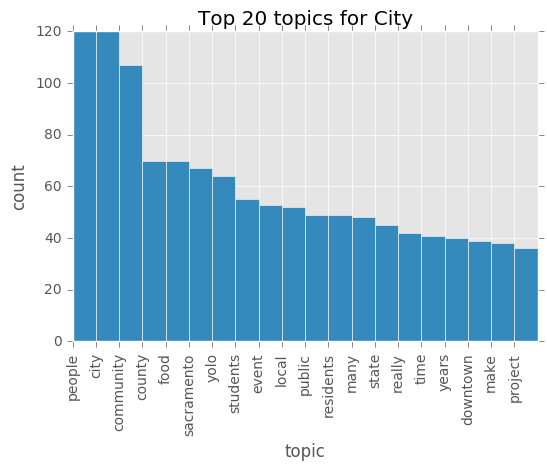

In [6]:
# do above on city frame
labels, values = analyze_corpus(city_frame) #sort based on most

indexes = np.arange(len(labels))
plt.bar(indexes, values, width, label=labels)
plt.xticks(indexes, labels, rotation='vertical')
plt.xlabel('topic')
plt.ylabel('count')
plt.title('Top 20 topics for City')
plt.show()

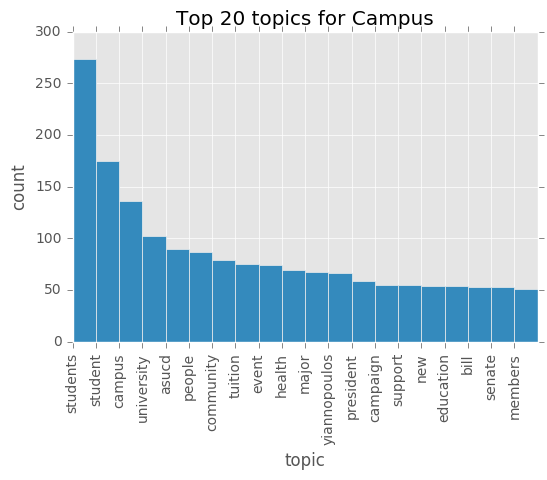

In [7]:
# do above on campus frame
labels, values = analyze_corpus(campus_frame) 

indexes = np.arange(len(labels)) #sort based on most

plt.bar(indexes, values, width, label=labels)
plt.xticks(indexes, labels, rotation='vertical')
plt.xlabel('topic')
plt.ylabel('count')
plt.title('Top 20 topics for Campus')
plt.show()

The Campus category seems to be focused on student body politics, the doings of the Academic Senate, tuition and students at UC Davis. The City category however seems to focus on topics related to cultural events, food, state and local topics and of course, Yolo County

<h2> What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common? </h2>

In [8]:
similarity_array = [] #array

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

# CODE FROM PROFESSOR - DENOISING PROCESS
# some parts of code from stack overflow
def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

def normalize(text):
    '''remove punctuation, lowercase, stem'''
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def sim(text1, text2):
    ''' given two unicode strings, perform nearest neightbor
    similation on both of them'''
    tfidf = vectorizer.fit_transform([text1, text2])
    similarity_array.append((text1, text2, ((tfidf * tfidf.T).A)[0,1]))

corpus = [article for article in bigframe.text] #corpus is array of all 120 articles

#using itertools, compare each element of corpus with every other element
for a, b in itertools.combinations(corpus, 2):
    sim(a,b)

In [9]:
for pair in similarity_array:
    if pair[2] > 0.50:
        print pair

(u'Mayor Robb Davis reaffirms that the City of Davis will not make any policy changes President Donald Trump signed an executive order on Jan. 25 threatening to withhold federal funds from cities and counties designated as "sanctuary jurisdictions." "Sanctuary jurisdiction" is a loosely-defined term used to denote cities and counties that choose to limit their cooperation with federal immigration agencies. The controversial executive order, titled "Enhancing Public Safety in the Interior of the United States," was met with immediate opposition. Many sanctuary cities have publicly stated that they will not change their policies. The City of Davis has been a sanctuary city since 1986, and Mayor Robb Davis recently reaffirmed that the city will not change its policies or status. Other notable sanctuary cities include New York City, Chicago, Seattle, Los Angeles and San Francisco. Davis explained that the City of Davis\' sanctuary policy is simple: police do not, under any circumstance, in

With nearest neighbor analysis, I have found that 3 pairs of articles that are similar. The article with the 1.0 rating is ignored because a duplicate was found during web scraping (I did not remove the duplicate to keep the accuracy and legitmacy of what I found while scraping the City and Campus categories).

The articles are: 

1. UC Davis holds first mental health conference (https://theaggie.org/2017/02/17/uc-davis-holds-first-mental-health-conference/) and UC Davis to host first ever mental health conference (https://theaggie.org/2017/01/30/uc-davis-to-host-first-ever-mental-health-conference/) with 62.7% similarity. It is easy to understand why these are so similar as they were written by the same author and covers the same event: mental health. Similar words were: mental health, conference, speakers, stigma, healing, workshops, body, remarks, mental health, LGBTQIA.

2. University of California Regents meet, approve first tuition raise in six years (https://theaggie.org/2017/02/09/university-of-california-regents-meet-approve-first-tuition-raise-in-six-years/) and UC Regents vote to raise tuition for UC campuses (https://theaggie.org/2017/01/27/uc-regents-vote-to-raise-tuition-for-uc-campuses/) with 52.1% similarity. Both articles deal with meeting of UC Regents to approve tuition raises for all campuses. Common words were: Regents, tuition, increase, affordability, middle-class, fund, budget, Newsom.

3. Student regent recruitment for the 2018-2019 school year begins (https://theaggie.org/2017/01/16/student-regent-recruitment-for-the-2018-2019-school-year-begins/) and UC Board of Regents meeting to discuss current issues within the UC system (https://theaggie.org/2016/12/02/uc-board-of-regents-meeting-to-discuss-current-issues-within-the-uc-system/) with accuracy of 52.24% similarity. Both articles deal with the institution of UC Board of Regents. Common words: Regents, member, board, students, university, education, system



<h2> Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning. </h2>

I think that the corpus is highly representative of the Aggie. The Aggie's focus is on local news relating to the UC System - particularly Davis - and local news pertraining to the campus community - whether that means Davis campus or Yolo county, Sacramento area. This is similar to what an analysis of the corpus in 1.4.1 has concluded. Looking at the bar graph, we can see that most topics relate to the above areas. 

This corpus can support many kinds of inference. We can infer what the campus is thinking and talking about by looking at this corpus. We can infer future trends by looking at the density of topics within a recent time frame (if we see a huge conglomeration of the word "Trump" for articles in the past two days, we can infer that the next few days will also talk about Trump)